### 17. Morphological operators

- 이진 이미지에 기본 형태 연산자를 적용하는 방법

1. 모듈을 불러오고 이미지를 그레이스케일로 읽고, Otsu의 방식을 사용해 바이너리 이미지를 생성한다

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img = cv2.imread('../data/Lena.png', 0)
_, binary = cv2.threshold(img, -1, 1, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

2. 3 * 3 크기의 사각형 마스크를 사용해 침식과 팽창 변환을 10번 수행한다

In [5]:
eroded = cv2.morphologyEx(binary, cv2.MORPH_ERODE, (3,3),
                         iterations = 10)
dilated = cv2.morphologyEx(binary, cv2.MORPH_DILATE, (3,3),
                          iterations = 10)

3. 형태 열림 변환과 형태 닫힘 변환을 5 * 5 크기의 구조적 요소로 타원을 사용해 5번 수행한다

In [7]:
opened = cv2.morphologyEx(binary, cv2.MORPH_OPEN,
                         cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5)),
                         iterations = 5)
closed = cv2.morphologyEx(binary, cv2.MORPH_CLOSE,
                         cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5)),
                         iterations = 5)

4. 형태적 경사도를 계산한다

In [8]:
grad = cv2.morphologyEx(binary, cv2.MORPH_GRADIENT,
                       cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5)))

5. 결과를 시각화한다

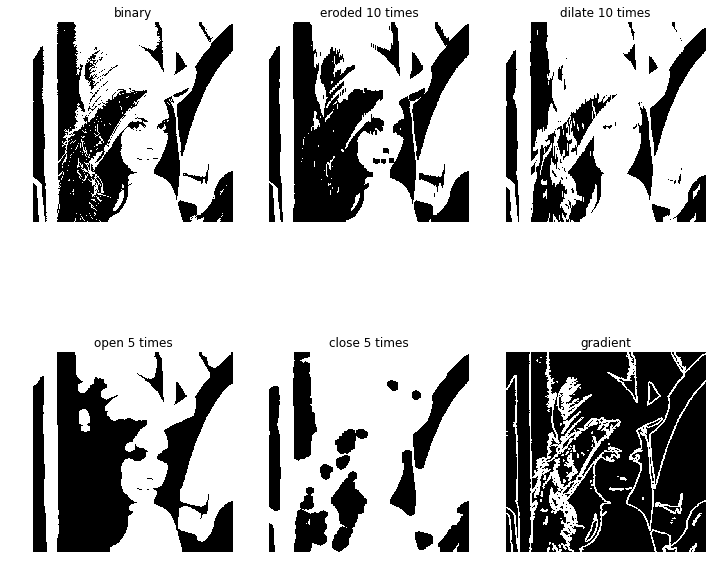

In [10]:
plt.figure(figsize=(10,10))
plt.subplot(231)
plt.axis('off')
plt.title('binary')
plt.imshow(binary, cmap='gray')

plt.subplot(232)
plt.axis('off')
plt.title('eroded 10 times')
plt.imshow(eroded, cmap='gray')

plt.subplot(233)
plt.axis('off')
plt.title('dilate 10 times')
plt.imshow(dilated, cmap='gray')

plt.subplot(234)
plt.axis('off')
plt.title('open 5 times')
plt.imshow(opened, cmap='gray')

plt.subplot(235)
plt.axis('off')
plt.title('close 5 times')
plt.imshow(closed, cmap='gray')

plt.subplot(236)
plt.axis('off')
plt.title('gradient')
plt.imshow(grad, cmap='gray')

plt.tight_layout()
plt.show()